In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt


Load in data. Can be found at https://raw.githubusercontent.com/bengant3/netsandnetworks/main/201819nbadata.csv

In [ ]:
# data from "https://raw.githubusercontent.com/bengant3/netsandnetworks/main/201819nbadata.csv"

# local method
# from google.colab import files
# d = files.upload()

# via url via pandas
dataDf = pd.read_csv("https://raw.githubusercontent.com/bengant3/netsandnetworks/main/201819nbadata.csv")
print(dataDf)


    rank                   name  average rank     index  ...  BLK  TOV   PF   PTS
0      1          Kawhi Leonard      1.833333  0.995417  ...   24  121   87  1596
1      2  Giannis Antetokounmpo      2.000000  0.995000  ...  110  268  232  1994
2      3           LeBron James      2.833333  0.992917  ...   33  197   94  1505
3      4          Stephen Curry      3.833333  0.990417  ...   25  192  166  1881
4      5           James Harden      4.833333  0.987917  ...   58  387  244  2818
..   ...                    ...           ...       ...  ...  ...  ...  ...   ...
67    68            P.J. Tucker     74.166667  0.814583  ...   39   63  252   601
68    69       Montrezl Harrell     74.666667  0.813333  ...  110  132  255  1361
69    70         Brandon Ingram     76.666667  0.808333  ...   31  129  149   950
70    71           Marcus Smart     79.166667  0.802083  ...   28  123  201   708
71    72       Patrick Beverley     80.500000  0.798750  ...   43   85  265   596

[72 rows x 25 c

Create a dictionary called `players` that returns the index in `d` of a given player.

In [ ]:
d = [dataDf.columns.values.tolist()] + dataDf.values.tolist()

players = {}
for row in d:
  players[row[1]] = row[0]

print(players)

{'name': 'rank', 'Kawhi Leonard': 1, 'Giannis Antetokounmpo': 2, 'LeBron James': 3, 'Stephen Curry': 4, 'James Harden': 5, 'Anthony Davis': 6, 'Joel Embiid': 7, 'Nikola Jokic': 8, 'Paul George': 9, 'Damian Lillard': 10, 'Kyrie Irving': 11, 'Russell Westbrook': 12, 'Jimmy Butler': 13, 'Karl-Anthony Towns': 14, 'Rudy Gobert': 15, 'Bradley Beal': 16, 'Draymond Green': 17, 'Ben Simmons': 18, 'Kemba Walker': 19, 'Blake Griffin': 20, 'Chris Paul': 21, 'Pascal Siakam': 22, 'Jrue Holiday': 23, 'Donovan Mitchell': 24, 'Luka Doncic': 25, 'CJ McCollum': 26, 'LaMarcus Aldridge': 27, 'Mike Conley': 28, 'Al Horford': 29, 'Khris Middleton': 30, 'Kyle Lowry': 31, 'Devin Booker': 32, 'Victor Oladipo': 33, "De'Aaron Fox": 34, 'Jamal Murray': 35, 'DeMar DeRozan': 36, 'Jayson Tatum': 37, 'Nikola Vucevic': 38, 'Kevin Love': 39, 'Tobias Harris': 40, "D'Angelo Russell": 41, 'Andre Drummond': 42, 'Myles Turner': 43, 'Trae Young': 44, 'Lou Williams': 45, 'John Collins': 46, 'Steven Adams': 47, 'Marc Gasol': 48

This is so we can access specific data points using the follow notation:

In [ ]:
print("Kawhi scored " + str(d[int(players['Kawhi Leonard'])][d[0].index("PTS")]) + " points")
print("Lebron James played " + str(d[int(players['LeBron James'])][d[0].index("MP")]) + " minutes")
print("Damian Lillard made " + str(d[int(players['Damian Lillard'])][d[0].index("3P")]) + " threes")

Kawhi scored 1596 points
Lebron James played 1937 minutes
Damian Lillard made 237 threes


Let's create a numpy array to store the actual statistics (from column Games Played 'G' onward). We will call this `features`.



In [ ]:
source = []
for row in d[1:]:
  sourcerow = []
  for i in range(8,25):
    sourcerow.append(float(row[i]))
  source.append(sourcerow)

print(str(source[0]) + "\n" + str(source[1]))
features = np.array(source)

[60.0, 60.0, 2040.0, 112.0, 302.0, 448.0, 827.0, 364.0, 426.0, 78.0, 361.0, 199.0, 106.0, 24.0, 121.0, 87.0, 1596.0]
[72.0, 72.0, 2358.0, 52.0, 203.0, 669.0, 1044.0, 500.0, 686.0, 159.0, 739.0, 424.0, 92.0, 110.0, 268.0, 232.0, 1994.0]


And a numpy array called `labels` to store the player indices. The neural network should be able to use the statistics in `features` to predict the values in `labels`.

In [ ]:
target = []
for row in d[1:]:
  target.append(float(row[3]))

print(target[0:4])
labels = np.array(target)

[0.9954166667000001, 0.995, 0.9929166667, 0.9904166667000001]


We use a normalization layer to try to normalize the statistics to approximately a normal distribution.

In [ ]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(source))
print(normalizer.mean.numpy())

See below what I mean: I converted the actual statistics of Kawhi, which can vary from 24 to 2040, to values with ±2 of 0, by creating a normal distribution for each of the 17 statistics.

In [ ]:
first = np.array(source[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example, Kawhi\'s statistics:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[  60.   60. 2040.  112.  302.  448.  827.  364.  426.   78.  361.  199.
   106.   24.  121.   87. 1596.]]

Normalized: [[-1.01 -0.25 -0.55 -0.1  -0.14  0.57  0.52  0.89  0.69 -0.29 -0.07 -0.67
   0.78 -0.63 -0.62 -1.71  0.58]]


Now we build our actual model called `dnn_model`, with 2 hidden layers of 64 nodes each.

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['accuracy'])
  return model

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 17)                35        
_________________________________________________________________
dense_3 (Dense)              (None, 64)                1152      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,412
Trainable params: 5,377
Non-trainable params: 35
_________________________________________________________________


Now we fit the model using our data, `features` and `labels`. We also time this to see how long it takes. The time taken mainly depends on how many epochs we specify. I try 6 different combinations of validation splits (0.2, 0.5, 0.8) and epochs (100 or 1000).

In [ ]:
%%time
history = {}
for i in range (0,6):
  history[i] = dnn_model.fit(
    features, labels,
    validation_split=(0.2+0.3*i//2),
    verbose=0, epochs=(100+900*i%2))

CPU times: user 10 s, sys: 419 ms, total: 10.4 s
Wall time: 12.9 s


You can see that the different don't make a huge difference in this case, but that generally, 1000 epochs is a little better than 100, and a 50/50 validation split 

In [ ]:
hist = {}
for i in range(0,6):
  hist[i] = pd.DataFrame(history[i].history)
  hist[i]['epoch'] = history[i].epoch
  print(hist[i][-3:])
  print(hist[i]['loss'][-1:]+hist[i]['val_loss'][-1:])
  print('\n')



        loss  accuracy  val_loss  val_accuracy  epoch
97  0.003539       0.0  0.139516           0.0     97
98  0.003853       0.0  0.141703           0.0     98
99  0.003670       0.0  0.138615           0.0     99
99    0.142285
dtype: float64


        loss  accuracy  val_loss  val_accuracy  epoch
97  0.002692       0.0  0.135940           0.0     97
98  0.002499       0.0  0.138484           0.0     98
99  0.003134       0.0  0.137669           0.0     99
99    0.140803
dtype: float64


        loss  accuracy  val_loss  val_accuracy  epoch
97  0.002998       0.0  0.138006           0.0     97
98  0.003665       0.0  0.136965           0.0     98
99  0.003424       0.0  0.135475           0.0     99
99    0.138899
dtype: float64


        loss  accuracy  val_loss  val_accuracy  epoch
97  0.002762       0.0  0.133352           0.0     97
98  0.003723       0.0  0.135782           0.0     98
99  0.002060       0.0  0.136393           0.0     99
99    0.138453
dtype: float64


        

In [ ]:
_, accuracy = dnn_model.evaluate(features, labels)
print('Accuracy: %.2f' % (accuracy*100))

3/3 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.0000e+00
Accuracy: 0.00


In [ ]:
test_results = {}

test_results['dnn_model'] = dnn_model.evaluate(features, labels, verbose=0)

print(test_results)

{'dnn_model': [0.029742982238531113, 0.0]}


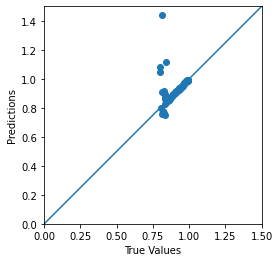

In [ ]:
test_predictions = dnn_model.predict(features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1.5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
dnn_model.save("drive/MyDrive/Colab Notebooks/")

INFO:tensorflow:Assets written to: drive/MyDrive/Colab Notebooks/assets


In [ ]:
def evaluatePlayer(playerStats):
  ret = " who averaged " + str(round(playerStats[16]/playerStats[0],1)) + " ppg,\t"
  ret = ret + str(round((playerStats[10]+playerStats[9])/playerStats[0],1)) + " rpg,\t"
  ret = ret + str(round(playerStats[11]/playerStats[0],1)) + " apg,\t"
  if(playerStats[3]+playerStats[5] == 0):
    ret = ret + " shooting 0%\t"
  else:
    ret = ret + " shooting " + str(round(100*(playerStats[3]+playerStats[5])/(playerStats[4]+playerStats[6]),1)) + "%\t"
  ret = ret + " had an index of " + str(dnn_model.predict([playerStats]))
  return ret 

In [ ]:
# "G","GS","MP","3P","3PA","2P","2PA","FT","FTA","ORB","DRB","AST","STL","BLK","TOV","PF","PTS"
newPlayer = [[76, 76, 1843, 95, 214, 197, 402, 146,  203, 67, 324, 303, 77, 34, 114, 139 ,825],
             [50, 50, 1000, 20, 100, 50, 150, 33, 88, 33, 55, 16, 8, 32, 10, 180, 193],
             [76, 76, 2043, 145, 274, 467, 782, 199, 243, 167, 524, 1003, 157, 94, 74, 139 ,1568],
             [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2],
             [60,2,430,0,10,24,60,2,5,0,5,0,0,0,0,0,50],
             [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90],]

predictions = dnn_model.predict(features)

# prints outliers
for i in range(0,predictions.size):
  if(abs(predictions[i][0]-labels[i]) > .1):
    print(str(d[i][1]) + " " + str(predictions[i]))

for row in newPlayer:
  print(evaluatePlayer(row))


Aaron Gordon [1.2833825]
Otto Porter [0.6025251]
Eric Gordon [0.953976]
Josh Richardson [0.9382225]
Jaren Jackson Jr. [0.7046638]
Julius Randle [1.8157332]
P.J. Tucker [1.2797236]
Brandon Ingram [1.2558609]
Marcus Smart [1.0691725]
 who averaged 10.9 ppg,	5.1 rpg,	4.0 apg,	 shooting 47.4%	 had an index of [[0.9682616]]
 who averaged 3.9 ppg,	1.8 rpg,	0.3 apg,	 shooting 28.0%	 had an index of [[1.2876446]]
 who averaged 20.6 ppg,	9.1 rpg,	13.2 apg,	 shooting 58.0%	 had an index of [[1.4947574]]
 who averaged 2.0 ppg,	0.0 rpg,	0.0 apg,	 shooting 0%	 had an index of [[1.2203585]]
 who averaged 0.8 ppg,	0.1 rpg,	0.0 apg,	 shooting 34.3%	 had an index of [[1.6047243]]
 who averaged 90.0 ppg,	0.0 rpg,	0.0 apg,	 shooting 0%	 had an index of [[1.2418689]]


These resulting index values we get are all over the place, indicating that our data set is too limited. Consider the 3.9-1.8-0.3 player, who had a higher index than anyone in the training data set. Obviously, that player is not better than Giannis or Lebron, but this shortfall seems almost expected when you consider that no one in the 70+ players in the set had a statline close to that. Most average 10+, if not 20+ points and a decent number of either rebound or assists as well. To put in oversimplified terms, the neural network had had no one to compare this statline to, so it has no idea how good they are.